In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=1754f987870b580dff5e319d41d5d222bf9630c0681bbe05960dd1005f28d4db
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Loan approval").getOrCreate()

In [ ]:
sc = spark.sparkContext

In [ ]:
data = spark.read.option('header',True).csv('/content/loan_approval_dataset.csv')

In [ ]:
data.show()

+-------+-----------------+-------------+--------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+
|loan_id| no_of_dependents|    education| self_employed| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value| loan_status|
+-------+-----------------+-------------+--------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+
|      1|                2|     Graduate|            No|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|    Approved|
|      2|                0| Not Graduate|           Yes|      4100000|    12200000|         8|         417|                  2700000|                 220000

In [ ]:
data.printSchema()

root
 |-- loan_id: string (nullable = true)
 |--  no_of_dependents: string (nullable = true)
 |--  education: string (nullable = true)
 |--  self_employed: string (nullable = true)
 |--  income_annum: string (nullable = true)
 |--  loan_amount: string (nullable = true)
 |--  loan_term: string (nullable = true)
 |--  cibil_score: string (nullable = true)
 |--  residential_assets_value: string (nullable = true)
 |--  commercial_assets_value: string (nullable = true)
 |--  luxury_assets_value: string (nullable = true)
 |--  bank_asset_value: string (nullable = true)
 |--  loan_status: string (nullable = true)



In [ ]:
data.count()

4269

In [ ]:
import pyspark.sql.functions as f
from pyspark.sql.types import IntegerType

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [ ]:
#CATEGORICAL COLUMNS : EDUCATION, SELF EMPLOYED AND APPROVAL:::

In [ ]:
indexer = StringIndexer(inputCol=' self_employed', outputCol='self_employed_numeric').fit(data)
data = indexer.transform(data)

In [ ]:
data.show()

+-------+-----------------+-------------+--------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+
|loan_id| no_of_dependents|    education| self_employed| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value| loan_status|self_employed_numeric|
+-------+-----------------+-------------+--------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+
|      1|                2|     Graduate|            No|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|    Approved|                  1.0|
|      2|                0| Not Graduate|           Yes|      410000

In [ ]:
data  = data.drop(' self_employed')
data.show()

+-------+-----------------+-------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+
|loan_id| no_of_dependents|    education| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value| loan_status|self_employed_numeric|
+-------+-----------------+-------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+
|      1|                2|     Graduate|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|    Approved|                  1.0|
|      2|                0| Not Graduate|      4100000|    12200000|         8|         417|                  2700000|          

In [ ]:
indexer = StringIndexer(inputCol = ' education',outputCol = 'education_numeric').fit(data)
data = indexer.transform(data)

In [ ]:
data.show()

+-------+-----------------+-------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+-----------------+
|loan_id| no_of_dependents|    education| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value| loan_status|self_employed_numeric|education_numeric|
+-------+-----------------+-------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+-----------------+
|      1|                2|     Graduate|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|    Approved|                  1.0|              0.0|
|      2|                0| Not Graduate|      4100000| 

In [ ]:
data = data.drop(' education')
data.show()

+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+-----------------+
|loan_id| no_of_dependents| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value| loan_status|self_employed_numeric|education_numeric|
+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+-----------------+
|      1|                2|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|    Approved|                  1.0|              0.0|
|      2|                0|      4100000|    12200000|         8|         417|                  2700000|        

In [ ]:

indexer = StringIndexer(inputCol = ' loan_status',outputCol = 'loan_status').fit(data)
data = indexer.transform(data)

In [ ]:
data.show()

+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+-----------------+-----------+
|loan_id| no_of_dependents| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value| loan_status|self_employed_numeric|education_numeric|loan_status|
+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+------------+---------------------+-----------------+-----------+
|      1|                2|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|    Approved|                  1.0|              0.0|        0.0|
|      2|                0|      4100000|    12200000|         8

In [ ]:
data = data.drop(' loan_status')
data.show()

+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+---------------------+-----------------+-----------+
|loan_id| no_of_dependents| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value|self_employed_numeric|education_numeric|loan_status|
+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+---------------------+-----------------+-----------+
|      1|                2|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|                  1.0|              0.0|        0.0|
|      2|                0|      4100000|    12200000|         8|         417|                  2700000|            

In [ ]:
data.printSchema()

root
 |-- loan_id: string (nullable = true)
 |--  no_of_dependents: string (nullable = true)
 |--  income_annum: string (nullable = true)
 |--  loan_amount: string (nullable = true)
 |--  loan_term: string (nullable = true)
 |--  cibil_score: string (nullable = true)
 |--  residential_assets_value: string (nullable = true)
 |--  commercial_assets_value: string (nullable = true)
 |--  luxury_assets_value: string (nullable = true)
 |--  bank_asset_value: string (nullable = true)
 |-- self_employed_numeric: double (nullable = false)
 |-- education_numeric: double (nullable = false)
 |-- loan_status: double (nullable = false)



In [ ]:
inputcolumns = [' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']

In [ ]:
for i in inputcolumns:
  data = data.withColumn(i,data[i].cast(IntegerType()))

In [ ]:
data.printSchema()

root
 |-- loan_id: string (nullable = true)
 |--  no_of_dependents: integer (nullable = true)
 |--  income_annum: integer (nullable = true)
 |--  loan_amount: integer (nullable = true)
 |--  loan_term: integer (nullable = true)
 |--  cibil_score: integer (nullable = true)
 |--  residential_assets_value: integer (nullable = true)
 |--  commercial_assets_value: integer (nullable = true)
 |--  luxury_assets_value: integer (nullable = true)
 |--  bank_asset_value: integer (nullable = true)
 |-- self_employed_numeric: double (nullable = false)
 |-- education_numeric: double (nullable = false)
 |-- loan_status: double (nullable = false)



In [ ]:
data = data.na.fill(0.0)

# Replace infinite values with a large finite value (e.g., 1e10)
data = data.na.replace(float('inf'), 1.0e10)

In [ ]:
inputcolumn = [' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value','self_employed_numeric','education_numeric']

In [ ]:
d = VectorAssembler(inputCols = inputcolumn, outputCol = 'attributes')
data = d.transform(data)

In [ ]:
data.show()

+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+---------------------+-----------------+-----------+--------------------+
|loan_id| no_of_dependents| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value|self_employed_numeric|education_numeric|loan_status|          attributes|
+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+---------------------+-----------------+-----------+--------------------+
|      1|                2|      9600000|    29900000|        12|         778|                  2400000|                17600000|            22700000|          8000000|                  1.0|              0.0|        0.0|[2.0,9600000.0,2....|
|      2|                0|     

In [ ]:
train, test = data.randomSplit([0.8,0.2], seed=11)

In [ ]:
train.count()

3437

In [ ]:
test.count()

832

***LOGISTIC REGRESSION***

In [ ]:
from pyspark.ml.classification import LogisticRegression

log = LogisticRegression(featuresCol='attributes',
                             labelCol='loan_status')

In [ ]:
pipe = Pipeline(stages = [log])

In [ ]:
fit_model = pipe.fit(train)

In [ ]:
results = fit_model.transform(test)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
res = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='loan_status')
efficiency = res.evaluate(results)

In [ ]:
print("Accuracy of the model is: ",efficiency*100,"%")

Accuracy of the model is:  89.37228915662652 %


In [ ]:
param_grid_log = ParamGridBuilder() \
    .addGrid(log.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(log.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="loan_status", rawPredictionCol="prediction")

In [ ]:
crossval = CrossValidator(estimator=log,
                          estimatorParamMaps=param_grid_log,
                          evaluator=evaluator,
                          numFolds=5)

In [ ]:
cv_model_log = crossval.fit(train)


In [ ]:
best_model_log = cv_model_log.bestModel
best_reg_param = best_model_log._java_obj.getRegParam()
best_elastic_net_param = best_model_log._java_obj.getElasticNetParam()

In [ ]:
predictions_log = best_model_log.transform(test)

In [ ]:
bestaccuracy_log = evaluator.evaluate(predictions_log)
print(f"Best regularizing parameter: {best_reg_param}")
print(f"Best elastic net parameter: {best_elastic_net_param}")
print()
print(f"AND THEY GIVE OUT ACCURACY AS: {bestaccuracy_log*100}")

Best regularizing parameter: 0.01
Best elastic net parameter: 0.0

AND THEY GIVE OUT ACCURACY AS: 89.87228915662651


In [ ]:
print('Difference in ACCURACY after HyperParameter Tuning is',(bestaccuracy_log-efficiency)*100)

Difference in ACCURACY after HyperParameter Tuning is 0.49999999999998934


In [ ]:
results.show()

+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+---------------------+-----------------+-----------+--------------------+--------------------+--------------------+----------+
|loan_id| no_of_dependents| income_annum| loan_amount| loan_term| cibil_score| residential_assets_value| commercial_assets_value| luxury_assets_value| bank_asset_value|self_employed_numeric|education_numeric|loan_status|          attributes|       rawPrediction|         probability|prediction|
+-------+-----------------+-------------+------------+----------+------------+-------------------------+------------------------+--------------------+-----------------+---------------------+-----------------+-----------+--------------------+--------------------+--------------------+----------+
|   1002|                1|      4900000|    17700000|         8|         722|                  9200000|           

***RANDOM FOREST***

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(labelCol="loan_status", featuresCol="attributes", numTrees=100)

In [ ]:
model = rf.fit(train)

In [ ]:
predictions = model.transform(test)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="loan_status", rawPredictionCol="prediction")
accuracy_rf = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy_rf*100}")

Accuracy: 94.8855421686747


In [ ]:
feature_importances = model.featureImportances
print("Feature Importances:")
for i in range(len(inputcolumn)):
    print(f"{inputcolumn[i]}: {feature_importances[i]}")
    print()

Feature Importances:
 no_of_dependents: 0.003194027723214217

 income_annum: 0.0068814708482317286

 loan_amount: 0.011487211652791833

 loan_term: 0.0798226054029281

 cibil_score: 0.8764986912499868

 residential_assets_value: 0.004838895863522044

 commercial_assets_value: 0.005039408129603976

 luxury_assets_value: 0.0062605580175798545

 bank_asset_value: 0.0052335976736371664

self_employed_numeric: 0.0002232433898657678

education_numeric: 0.0005202900486385249



In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 50, 100])
             .addGrid(rf.maxDepth, [5, 10, 15])
             .build())

In [ ]:
evaluator_after_parameter = BinaryClassificationEvaluator(labelCol="loan_status", rawPredictionCol="prediction")

In [ ]:
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator_after_parameter, numFolds=5)


In [ ]:
cvModel = cv.fit(train)

In [ ]:
best_rf_model = cvModel.bestModel

In [ ]:
test_results = best_rf_model.transform(test)
accuracy_after_parameter = evaluator_after_parameter.evaluate(test_results)


In [ ]:
best_num_trees = best_rf_model.getNumTrees
best_max_depth = best_rf_model.getMaxDepth()

print("Best Hyperparameters:")
print(f"Number of Trees: {best_num_trees}")
print(f"Max Depth: {best_max_depth}")
print()
print(f"AND THEY GIVE OUT ACCURACY AS: {accuracy_after_parameter*100}")

Best Hyperparameters:
Number of Trees: 100
Max Depth: 15

AND THEY GIVE OUT ACCURACY AS: 96.13614457831325


In [ ]:
print('Difference in ACCURACY after HyperParameter Tuning is',(accuracy_after_parameter-accuracy_rf)*100)

Difference in ACCURACY after HyperParameter Tuning is 1.250602409638557


***GBT CLASSIFIER***

In [ ]:
from pyspark.ml.classification import GBTClassifier

In [ ]:
gbt = GBTClassifier(labelCol="loan_status", featuresCol="attributes", maxIter=10)


In [ ]:
pipeline = Pipeline(stages=[gbt])

In [ ]:
model = pipeline.fit(train)

In [ ]:
predictions_gbt = model.transform(test)


In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="loan_status", rawPredictionCol="prediction")
accuracy_gbt = evaluator.evaluate(predictions_gbt)

In [ ]:
accuracy_gbt

0.9543614457831324

In [ ]:
paramGrid_gbt = (ParamGridBuilder()
    .addGrid(gbt.maxIter, [10, 20, 30])
    .addGrid(gbt.stepSize, [0.1, 0.01])
    .build())

In [ ]:
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid_gbt,
                          evaluator=evaluator,
                          numFolds=5)

In [ ]:
cvModel_gbt = crossval.fit(train)

In [ ]:
bestModel_gbt = cvModel_gbt.bestModel
bestMaxIter = bestModel_gbt.stages[0].getMaxIter()
bestStepSize = bestModel_gbt.stages[0].getStepSize()

In [ ]:
predictions_gbt = bestModel_gbt.transform(test)

In [ ]:
bestaccuracy_gbt = evaluator.evaluate(predictions_gbt)
print(f"Best Max Iter: {bestMaxIter}")
print(f"Best Step Size: {bestStepSize}")
print()
print(f"AND THEY GIVE OUT ACCURACY AS: {bestaccuracy_gbt*100}")

Best Max Iter: 10
Best Step Size: 0.01

AND THEY GIVE OUT ACCURACY AS: 95.2855421686747


In [ ]:
print('Difference in accuracy after Hyper parameter tuning is',(bestaccuracy_gbt-accuracy_gbt)*100)

Difference in accuracy after Hyper parameter tuning is -0.150602409638545


***LINEAR SVC***

In [ ]:
from pyspark.ml.classification import LinearSVC

In [ ]:
svm = LinearSVC(featuresCol="attributes", labelCol="loan_status")
svm.setMaxIter(100)
svm.setRegParam(0.01)

LinearSVC_365646606a1d

In [ ]:
model = svm.fit(train)


In [ ]:
predictions_svc = model.transform(test)


In [ ]:
accuracy_svc = evaluator.evaluate(predictions_svc)
print("Accuracy:", accuracy_svc)

Accuracy: 0.9107831325301203


In [ ]:
paramGrid_svc = ParamGridBuilder() \
    .addGrid(svm.maxIter, [10, 50, 100]) \
    .addGrid(svm.standardization, [True, False]) \
    .build()

In [ ]:
crossval = CrossValidator(estimator=svm,
                          estimatorParamMaps=paramGrid_svc,
                          evaluator=evaluator,
                          numFolds=5)

In [ ]:
cvModel_svc = crossval.fit(train)

In [ ]:
bestModel_svc = cvModel_svc.bestModel
bestMaxIter = bestModel_svc.getMaxIter()
bestStandardization = bestModel_svc.getStandardization()


In [ ]:
bestPredictions = bestModel_svc.transform(test)

In [ ]:
bestaccuracy_svc = evaluator.evaluate(bestPredictions)

In [ ]:
print(f"Best Max Iter: {bestMaxIter}")
print(f"Best Standardization: {bestStandardization}")
print()
print(f"AND THEY GIVE OUT ACCURACY AS: {bestaccuracy_svc*100}")

Best Max Iter: 10
Best Standardization: False

AND THEY GIVE OUT ACCURACY AS: 92.18192771084337


In [ ]:
print('Difference in accuracy after Hyper parameter tuning is',(bestaccuracy_svc-accuracy_svc)*100)

Difference in accuracy after Hyper parameter tuning is 1.1036144578313367


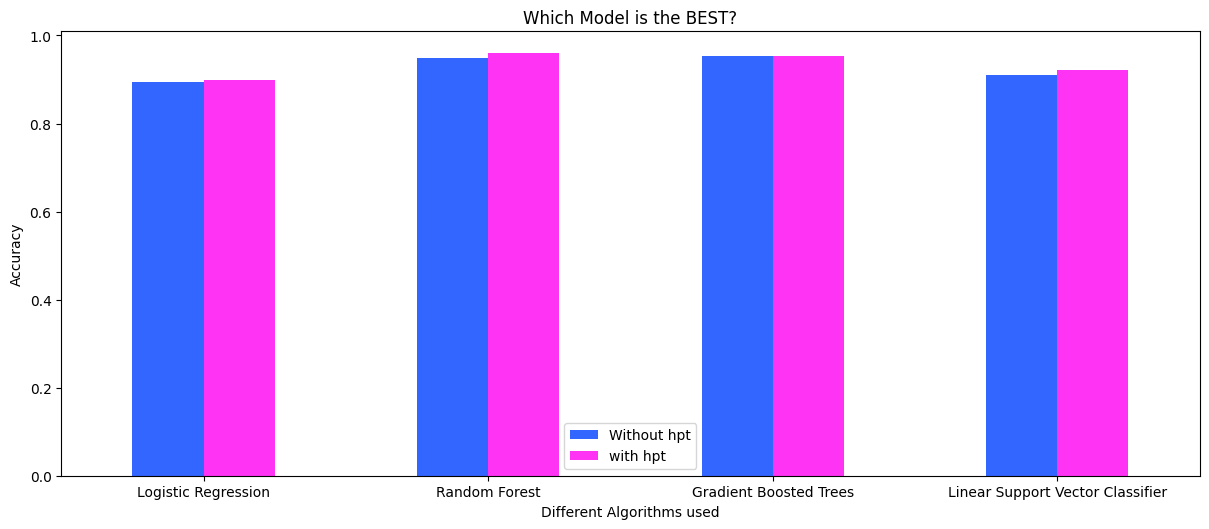

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
tags = ['Logistic Regression','Random Forest','Gradient Boosted Trees','Linear Support Vector Classifier']

a = [efficiency,accuracy_rf,accuracy_gbt,accuracy_svc]
b = [bestaccuracy_log,accuracy_after_parameter,bestaccuracy_gbt, bestaccuracy_svc]
colors = ['#3366FF', '#FF33F4']
df_histo = pd.DataFrame({'Without hpt':a , 'with hpt':b}, index=tags)
df_histo.plot.bar(rot=0, figsize=(12, 5),color=colors)
plt.tight_layout()
plt.xlabel('Different Algorithms used')
plt.ylabel('Accuracy')
plt.title('Which Model is the BEST?')
plt.show()